In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/AI03 GP/Rheumatic and Autoimmune Disease Dataset.xlsx"
df = pd.read_excel(file_path)
df.head()

Mounted at /content/drive


,Age,Gender,ESR,CRP,RF,Anti-CCP,HLA-B27,ANA,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,C3,C4,Disease
0,70,Male,39.0,18.6,34.2,29.9,Positive,Negative,Positive,Negative,Positive,Positive,NaN,27.0,Rheumatoid Arthritis
1,39,Female,26.0,21.7,35.5,28.9,Negative,NaN,Positive,NaN,Positive,NaN,100.0,66.0,Rheumatoid Arthritis
2,36,Female,41.0,15.6,21.3,21.3,Negative,Negative,NaN,Positive,Negative,NaN,158.0,12.0,Rheumatoid Arthritis
3,35,Male,43.0,23.4,26.0,39.0,NaN,NaN,Positive,Positive,NaN,NaN,119.0,41.0,Rheumatoid Arthritis
4,37,Female,30.0,NaN,38.1,30.8,Positive,Negative,Positive,Negative,Positive,Negative,144.0,49.0,Rheumatoid Arthritis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
df = df[df["Disease"].isin(["Normal", "Rheumatoid Arthritis","Psoriatic Arthritis","Sjögren's Syndrome","Systemic Lupus Erythematosus"])]
df.to_excel("filtered_rheumatoid_normal.xlsx", index=False)

print("Filtered shape:", df.shape)

Filtered shape: (9442, 15)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9442 entries, 0 to 12084
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         9442 non-null   int64  
 1   Gender      9442 non-null   object 
 2   ESR         8591 non-null   float64
 3   CRP         7563 non-null   float64
 4   RF          8409 non-null   float64
 5   Anti-CCP    6876 non-null   float64
 6   HLA-B27     7911 non-null   object 
 7   ANA         6520 non-null   object 
 8   Anti-Ro     7199 non-null   object 
 9   Anti-La     7072 non-null   object 
 10  Anti-dsDNA  5749 non-null   object 
 11  Anti-Sm     5369 non-null   object 
 12  C3          8137 non-null   float64
 13  C4          7806 non-null   float64
 14  Disease     9442 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df.describe()


,Age,ESR,CRP,RF,Anti-CCP,C3,C4
count,9442.000000,8591.000000,7563.000000,8409.000000,6876.000000,8137.000000,7806.000000
mean,49.769646,22.342684,11.359408,19.593792,19.532999,129.423006,36.881245
std,17.633399,15.549632,10.629609,11.548766,11.663029,37.554058,20.450659
min,20.000000,0.000000,0.100000,0.000000,0.000000,50.000000,5.000000
25%,34.000000,8.000000,1.500000,9.500000,9.400000,101.000000,19.000000
50%,50.000000,19.000000,2.900000,18.900000,18.800000,131.000000,37.000000
75%,65.000000,36.000000,21.500000,29.700000,29.700000,159.000000,54.000000
max,80.000000,49.000000,30.000000,40.000000,40.000000,205.000000,74.000000


In [ ]:
df.describe(include='object')


,Gender,HLA-B27,ANA,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,Disease
count,9442,7911,6520,7199,7072,5749,5369,9442
unique,2,2,2,2,2,2,2,5
top,Male,Positive,Positive,Positive,Positive,Positive,Positive,Rheumatoid Arthritis
freq,4820,3991,4346,4281,4305,3284,3006,2848


In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
ESR,851
CRP,1879
RF,1033
Anti-CCP,2566
HLA-B27,1531
ANA,2922
Anti-Ro,2243
Anti-La,2370


In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 9442
Columns: 15


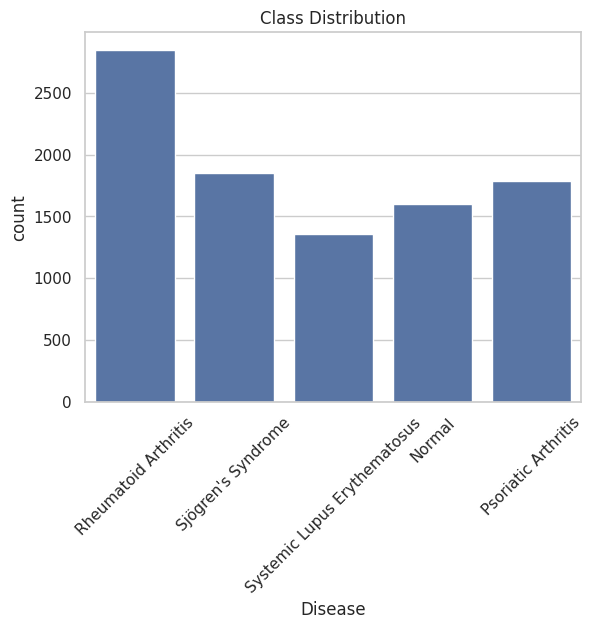

In [ ]:
df['Disease'].value_counts()
sns.countplot(data=df, x='Disease')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())


Numeric columns: ['Age', 'ESR', 'CRP', 'RF', 'Anti-CCP', 'C3', 'C4']
Categorical columns: ['Gender', 'HLA-B27', 'ANA', 'Anti-Ro', 'Anti-La', 'Anti-dsDNA', 'Anti-Sm', 'Disease']


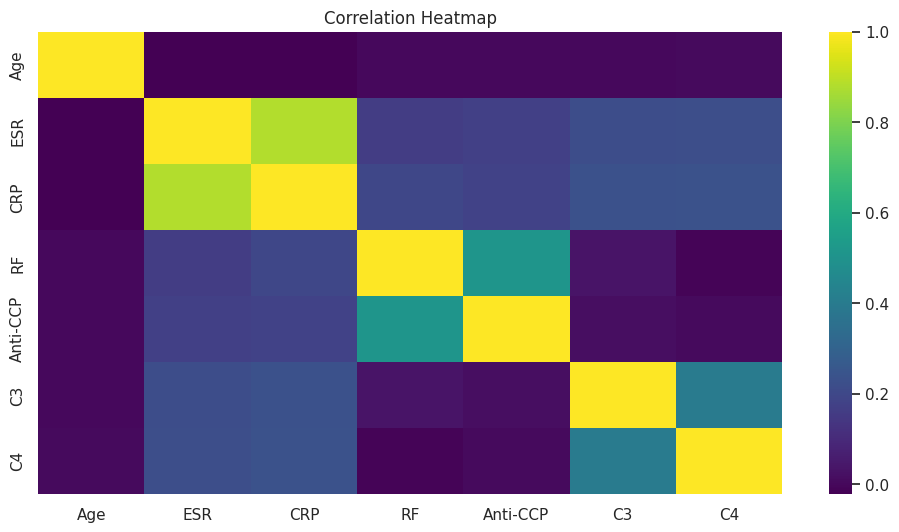

In [ ]:

plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


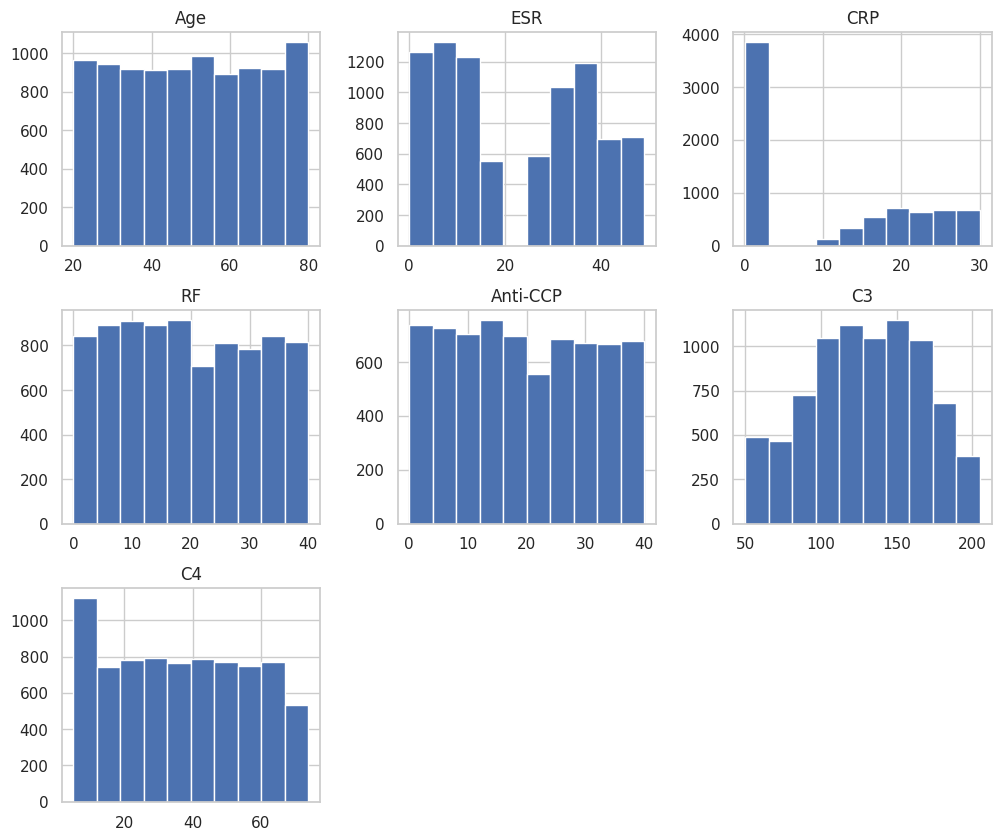

In [ ]:
df[numeric_cols].hist(figsize=(12,10))
plt.show()


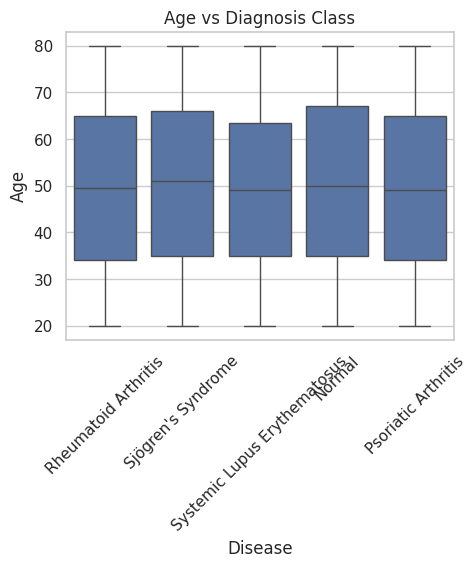

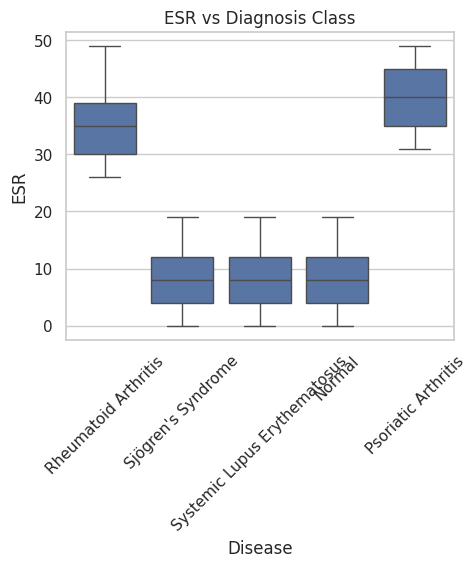

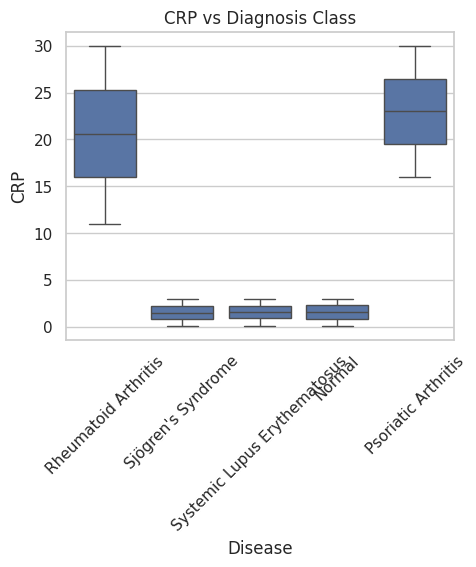

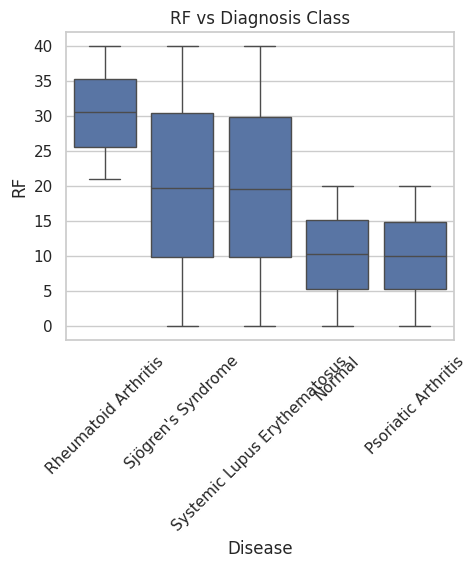

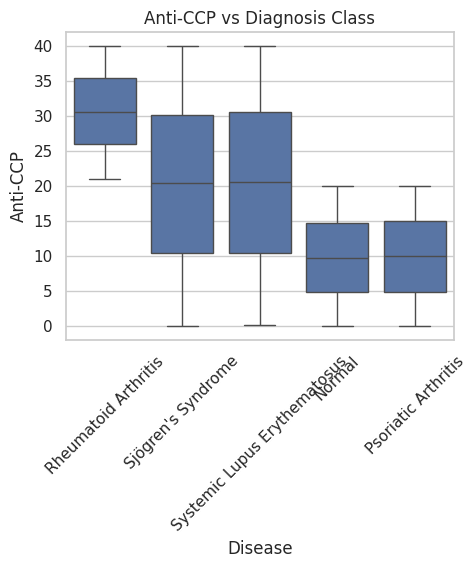

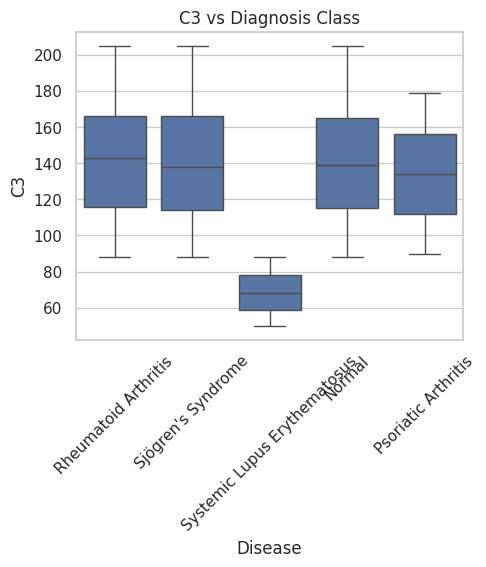

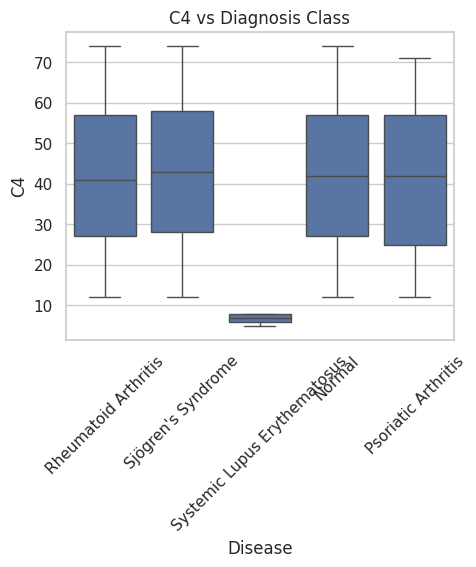

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='Disease', y=col, data=df)
    plt.title(f"{col} vs Diagnosis Class")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# numeric features → median
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# categorical features → most frequent category
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
ESR,0
CRP,0
RF,0
Anti-CCP,0
HLA-B27,0
ANA,0
Anti-Ro,0
Anti-La,0


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, classification_report

TARGET = "Disease"

X = df.drop(columns=[TARGET])
y = df[TARGET].astype(str)

# Identify column types
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

base_model = LogisticRegression(
    max_iter=3000,
    class_weight="balanced",   # helpful if classes are imbalanced
    multi_class="auto"
)

# Pipeline: preprocessing -> model
pipe = Pipeline([
    ("prep", preprocess),
    ("clf", base_model)
])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Calibrate probabilities (better risk scores)
calibrated = CalibratedClassifierCV(pipe, method="isotonic", cv=5)
calibrated.fit(X_train, y_train)

# Risk scores = predicted probabilities for each disease
proba = calibrated.predict_proba(X_test)
classes = calibrated.classes_

risk_scores = pd.DataFrame(proba, columns=[f"risk_{c}" for c in classes], index=X_test.index)

# Example: top predicted disease + its probability
top_idx = np.argmax(proba, axis=1)
risk_scores["predicted_disease"] = [classes[i] for i in top_idx]
risk_scores["predicted_risk"] = proba[np.arange(len(proba)), top_idx]

print(risk_scores.head())

# Evaluation: ROC-AUC one-vs-rest (multiclass)
# sklearn needs binarized labels for multiclass ROC-AUC
y_test_bin = pd.get_dummies(y_test).reindex(columns=classes, fill_value=0).values
auc_ovr = roc_auc_score(y_test_bin, proba, multi_class="ovr")
print("ROC-AUC (OVR):", auc_ovr)

print(classification_report(y_test, calibrated.predict(X_test)))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

      risk_Normal  risk_Psoriatic Arthritis  risk_Rheumatoid Arthritis  \
8796     0.905489                  0.003753                   0.000000   
7030     0.126696                  0.000000                   0.006704   
8470     0.078371                  0.001279                   0.000000   
6698     0.000000                  0.000000                   0.211926   
7788     0.015922                  0.004364                   0.008671   

      risk_Sjögren's Syndrome  risk_Systemic Lupus Erythematosus  \
8796                 0.090758                           0.000000   
7030                 0.866600                           0.000000   
8470                 0.000000                           0.920350   
6698                 0.788074                           0.000000   
7788                 0.000000                           0.971043   

                 predicted_disease  predicted_risk  
8796                        Normal        0.905489  
7030            Sjögren's Syndrome      

In [ ]:
import numpy as np
import pandas as pd

class DiseaseXAILayer:
    """
    XAI for CalibratedClassifierCV(Pipeline(prep=ColumnTransformer, clf=LogisticRegression)).
    Explains the underlying logistic regression contributions while reporting calibrated risk.
    """

    def __init__(self, calibrated_model: object, num_top: int = 5):
        self.cal = calibrated_model
        self.num_top = num_top
        self.classes_ = list(self.cal.classes_)

        # CalibratedClassifierCV stores multiple calibrated estimators (one per CV split)
        self._calibrated_clfs = getattr(self.cal, "calibrated_classifiers_", None)
        if not self._calibrated_clfs:
            raise ValueError(
                "This XAI layer expects a fitted CalibratedClassifierCV with calibrated_classifiers_. "
                "Make sure you called calibrated.fit(...)."
            )

        # Use the first fold pipeline to read structure (prep + clf)
        first_pipe = self._calibrated_clfs[0].estimator
        self.pipe_ = first_pipe
        self.prep_ = first_pipe.named_steps["prep"]
        self.clf_name_ = "clf"
        self._feature_names = self._get_feature_names()

        # Average coefficients across CV estimators for stability
        self.coef_, self.intercept_ = self._avg_lr_params()

        # Build maps to aggregate one-hot contributions back to original features
        self._build_feature_group_index()

    def _avg_lr_params(self):
        coefs = []
        intercepts = []
        for cc in self._calibrated_clfs:
            pipe = cc.estimator
            lr = pipe.named_steps[self.clf_name_]
            coefs.append(lr.coef_)
            intercepts.append(lr.intercept_)
        coef = np.mean(np.stack(coefs, axis=0), axis=0)
        intercept = np.mean(np.stack(intercepts, axis=0), axis=0)
        return coef, intercept

    def _get_feature_names(self):
        # sklearn >= 1.0 usually supports this
        try:
            return self.prep_.get_feature_names_out().tolist()
        except Exception:
            # Fallback: generic names
            # (still works but explanations less readable)
            # Determine output dimension by transforming a single row later if needed.
            return None

    def _build_feature_group_index(self):
        """
        Build a mapping from transformed columns to original features:
        - numeric: num__<feature>
        - categorical onehot: cat__<feature>_<category>
        We'll aggregate all onehot columns belonging to a categorical feature.
        """
        if self._feature_names is None:
            self.group_to_indices_ = None
            self.col_to_group_ = None
            return

        group_to_indices = {}
        col_to_group = {}

        for j, fname in enumerate(self._feature_names):
            if fname.startswith("num__"):
                group = fname.replace("num__", "", 1)
            elif fname.startswith("cat__"):
                # fname like cat__Sex_Male or cat__smoking_status_former
                # group is the original feature name (before the first "_")
                rest = fname.replace("cat__", "", 1)
                # For OHE, the pattern is "<feature>_<category>"
                # We split only on the FIRST underscore to keep categories with underscores intact
                if "_" in rest:
                    group = rest.split("_", 1)[0]
                else:
                    group = rest
            else:
                group = fname  # fallback

            group_to_indices.setdefault(group, []).append(j)
            col_to_group[j] = group

        self.group_to_indices_ = group_to_indices
        self.col_to_group_ = col_to_group

    def risk_scores(self, X_raw: pd.DataFrame) -> pd.DataFrame:
        """
        Returns calibrated risk scores per disease for each row in X_raw.
        """
        proba = self.cal.predict_proba(X_raw)
        out = pd.DataFrame(proba, columns=[f"risk_{c}" for c in self.classes_], index=X_raw.index)
        top_idx = np.argmax(proba, axis=1)
        out["predicted_disease"] = [self.classes_[i] for i in top_idx]
        out["predicted_risk"] = proba[np.arange(len(proba)), top_idx]
        return out

    def _linear_scores(self, X_raw: pd.DataFrame) -> np.ndarray:
        """
        Compute underlying LR linear scores (logits) on preprocessed features:
        score_c = intercept_c + x_proc @ coef_c
        """
        Xp = self.prep_.transform(X_raw)
        # Ensure dense for easier ops
        if hasattr(Xp, "toarray"):
            Xp = Xp.toarray()
        scores = Xp @ self.coef_.T + self.intercept_
        return scores, Xp

    def explain_row(
        self,
        X_raw_row: pd.DataFrame,
        disease: str = None,
        top_k: int = None
    ) -> dict:
        """
        Explain one row (must be a 1-row DataFrame).
        Returns a structured explanation object suitable for patient rendering.
        """
        if not isinstance(X_raw_row, pd.DataFrame) or len(X_raw_row) != 1:
            raise ValueError("X_raw_row must be a 1-row pandas DataFrame, e.g. X_test.iloc[[i]]")

        top_k = top_k or self.num_top

        # Calibrated risk scores
        proba = self.cal.predict_proba(X_raw_row)[0]
        risks = {cls: float(p) for cls, p in zip(self.classes_, proba)}
        pred_idx = int(np.argmax(proba))
        pred_disease = self.classes_[pred_idx]

        # Choose disease to explain
        if disease is None:
            disease = pred_disease
        if disease not in self.classes_:
            raise ValueError(f"disease='{disease}' not in classes: {self.classes_}")
        class_idx = self.classes_.index(disease)

        # Underlying LR contributions
        scores, Xp = self._linear_scores(X_raw_row)
        x_vec = Xp[0]  # shape (n_features,)
        coef_vec = self.coef_[class_idx]  # shape (n_features,)
        contrib_vec = x_vec * coef_vec  # per transformed feature contribution

        # Aggregate contributions back to original feature groups (especially one-hot)
        if self.group_to_indices_ is None:
            # fallback: per transformed column
            contrib_items = []
            for j, v in enumerate(contrib_vec):
                name = self._feature_names[j] if self._feature_names else f"f{j}"
                contrib_items.append((name, float(v)))
        else:
            contrib_items = []
            for group, idxs in self.group_to_indices_.items():
                val = float(np.sum(contrib_vec[idxs]))
                contrib_items.append((group, val))

        # Sort by impact
        contrib_items.sort(key=lambda t: t[1], reverse=True)
        drivers_up = [(k, v) for (k, v) in contrib_items if v > 0][:top_k]
        drivers_down = [(k, v) for (k, v) in reversed(contrib_items) if v < 0][:top_k]

        # Build friendly driver statements with raw values
        raw_row = X_raw_row.iloc[0].to_dict()

        def pretty_value(feat):
            if feat in raw_row:
                return raw_row[feat]
            return None

        drivers_up_fmt = []
        for feat, strength in drivers_up:
            drivers_up_fmt.append({
                "feature": feat,
                "raw_value": pretty_value(feat),
                "direction": "increases",
                "strength": strength
            })

        drivers_down_fmt = []
        for feat, strength in drivers_down:
            drivers_down_fmt.append({
                "feature": feat,
                "raw_value": pretty_value(feat),
                "direction": "decreases",
                "strength": strength
            })

        # A simple uncertainty hint: low max probability => uncertain prediction (not perfect, but useful)
        max_p = float(np.max(proba))
        if max_p >= 0.80:
            uncertainty_note = "Model confidence is relatively high (one disease probability is much higher than the others)."
        elif max_p >= 0.60:
            uncertainty_note = "Model confidence is moderate (top probabilities are somewhat close)."
        else:
            uncertainty_note = "Model confidence is low (several diseases have similar probabilities)."

        return {
            "predicted_disease": pred_disease,
            "predicted_risk": float(proba[pred_idx]),
            "explained_disease": disease,
            "risk_scores": risks,
            "drivers_up": drivers_up_fmt,
            "drivers_down": drivers_down_fmt,
            "uncertainty_note": uncertainty_note,
            "disclaimer": "This is a model estimate, not a diagnosis. Please discuss results with a clinician."
        }

    def render_patient_text(self, explanation: dict, top_k: int = 3) -> str:
        """
        Convert explanation dict into patient-friendly text.
        """
        disease = explanation["explained_disease"]
        risk = explanation["risk_scores"][disease]
        pred = explanation["predicted_disease"]
        pred_risk = explanation["predicted_risk"]

        def pct(x):
            return f"{100*x:.1f}%"

        lines = []
        lines.append(f"Your estimated risk for **{disease}** is **{pct(risk)}**.")
        if disease == pred:
            lines.append(f"This is the highest estimated risk among the diseases the model checked (**{pred}** at **{pct(pred_risk)}**).")
        lines.append("")
        lines.append("Key factors that influenced this estimate:")
        for d in explanation["drivers_up"][:top_k]:
            rv = d["raw_value"]
            if rv is None:
                lines.append(f"- **{d['feature']}** tended to increase the model’s estimate.")
            else:
                lines.append(f"- **{d['feature']}** (your value: {rv}) tended to increase the model’s estimate.")
        for d in explanation["drivers_down"][:top_k]:
            rv = d["raw_value"]
            if rv is None:
                lines.append(f"- **{d['feature']}** tended to decrease the model’s estimate.")
            else:
                lines.append(f"- **{d['feature']}** (your value: {rv}) tended to decrease the model’s estimate.")
        lines.append("")
        lines.append(explanation["uncertainty_note"])
        lines.append(explanation["disclaimer"])
        return "\n".join(lines)


In [ ]:
# Build XAI layer
xai = DiseaseXAILayer(calibrated_model=calibrated, num_top=5)

# Explain one patient from X_test
i = 0
X_raw_row = X_test.iloc[[i]]  # IMPORTANT: keep double brackets => DataFrame

explanation = xai.explain_row(X_raw_row)  # explains predicted disease by default
print(explanation)

# Patient-friendly message
print(xai.render_patient_text(explanation))


{'predicted_disease': 'Normal', 'predicted_risk': 0.9054885375824286, 'explained_disease': 'Normal', 'risk_scores': {'Normal': 0.9054885375824286, 'Psoriatic Arthritis': 0.0037530155822937785, 'Rheumatoid Arthritis': 0.0, "Sjögren's Syndrome": 0.09075844683527759, 'Systemic Lupus Erythematosus': 0.0}, 'drivers_up': [{'feature': 'ESR', 'raw_value': 7.0, 'direction': 'increases', 'strength': 2.6552964586751426}, {'feature': 'CRP', 'raw_value': 0.8, 'direction': 'increases', 'strength': 1.9480353210277754}, {'feature': 'Anti-CCP', 'raw_value': 2.9, 'direction': 'increases', 'strength': 1.3838227558524052}, {'feature': 'C3', 'raw_value': 193.0, 'direction': 'increases', 'strength': 1.1721601350674362}, {'feature': 'Anti-La', 'raw_value': 'Negative', 'direction': 'increases', 'strength': 0.5642957363273808}], 'drivers_down': [{'feature': 'ANA', 'raw_value': 'Positive', 'direction': 'decreases', 'strength': -0.9541252012013022}, {'feature': 'Anti-Sm', 'raw_value': 'Positive', 'direction': 'd

In [ ]:
pip install fastapi uvicorn pydantic joblib


In [ ]:
import joblib
joblib.dump(calibrated, "calibrated_model.joblib")

['calibrated_model.joblib']

In [ ]:
# main.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pandas as pd
import joblib
import numpy as np
# Import necessary libraries for your XAI (shap, lime, etc., based on your notebook)

app = FastAPI()

# 1. Load your trained model (Ensure you ran the joblib.dump line in your notebook)
# You might need to save the pipeline instead of just the classifier if preprocessing is separate
try:
    model = joblib.load("calibrated_model.joblib")
except:
    print("Model file not found. Please run the notebook to generate 'calibrated_model.joblib'")

# 2. Define the data structure expected from Flutter
class PatientData(BaseModel):
    Age: int
    Gender: str
    ESR: float = None
    CRP: float = None
    RF: float = None
    Anti_CCP: float = None  # Maps to 'Anti-CCP'
    HLA_B27: bool       # Maps to 'HLA-B27'
    ANA: bool
    Anti_Ro: bool       # Maps to 'Anti-Ro'
    Anti_La: bool       # Maps to 'Anti-La'
    Anti_dsDNA: bool    # Maps to 'Anti-dsDNA'
    Anti_Sm: bool       # Maps to 'Anti-Sm'
    C3: float = None
    C4: float = None

@app.post("/predict_xai")
def get_xai(data: PatientData):
    # 3. Convert Flutter boolean/numeric data to Model format
    # The notebook uses "Positive"/"Negative" strings for booleans
    input_dict = {
        "Age": [data.Age],
        "Gender": [data.Gender],
        "ESR": [data.ESR if data.ESR is not None else np.nan], # Handle missing values if model permits
        "CRP": [data.CRP if data.CRP is not None else np.nan],
        "RF": [data.RF if data.RF is not None else np.nan],
        "Anti-CCP": [data.Anti_CCP if data.Anti_CCP is not None else np.nan],
        "HLA-B27": ["Positive" if data.HLA_B27 else "Negative"],
        "ANA": ["Positive" if data.ANA else "Negative"],
        "Anti-Ro": ["Positive" if data.Anti_Ro else "Negative"],
        "Anti-La": ["Positive" if data.Anti_La else "Negative"],
        "Anti-dsDNA": ["Positive" if data.Anti_dsDNA else "Negative"],
        "Anti-Sm": ["Positive" if data.Anti_Sm else "Negative"],
        "C3": [data.C3 if data.C3 is not None else np.nan],
        "C4": [data.C4 if data.C4 is not None else np.nan],
    }

    df_input = pd.DataFrame(input_dict)

    # 4. Run Prediction
    prediction = model.predict(df_input)[0]
    probabilities = model.predict_proba(df_input)[0].tolist()

    # 5. Run XAI Logic
    # Instantiate your class from the notebook
    # xai_layer = DiseaseXAILayer(model, df_input)
    # xai_result = xai_layer.explain() # Adjust based on your actual class method names

    # Placeholder for XAI output (replace with actual return from DiseaseXAILayer)
    xai_output = "Feature 'Anti-CCP' contributed most to this prediction."

    return {
        "disease_prediction": prediction,
        "confidence": max(probabilities),
        "xai_explanation": xai_output
    }

# To run: uvicorn main:app --host 0.0.0.0 --port 8000